In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx

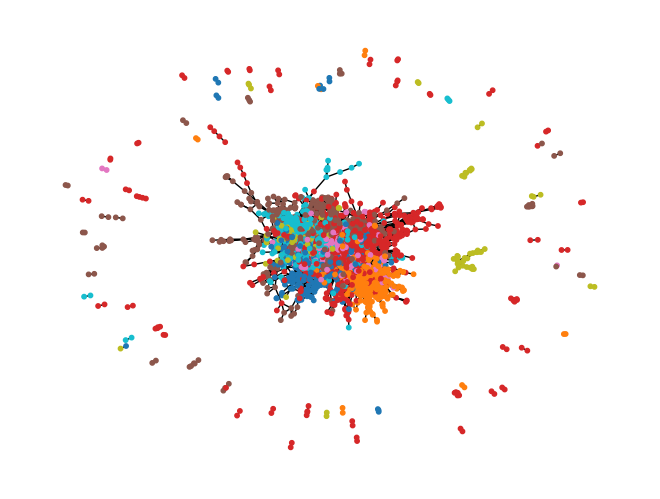

In [16]:
# Cora

# Edges
G = nx.read_edgelist(
    "../data/graphs/cora/cora.edges",
    delimiter=",",
    data=[("weight", int)],
    nodetype=int,
)

# Node labels
with open("../data/graphs/cora/cora.node_labels") as f:
    for line in f:
        node, label = line.strip().split(',')
        G.nodes[int(node)]['label'] = int(label)

# Draw with colors
nx.draw(
    G,
    node_color=[G.nodes[n]['label'] for n in G.nodes],
    cmap='tab10',
    node_size=10,
)
